# Project 2: Does Higher Tuition Lead to Higher Income?

Author: Yuhui (Rachel) Huang  
Course: Computing in Context  
Date: November 2025  

**Source dataset 1 (tuition):** https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay  
**Source dataset 2 (earnings):** https://collegescorecard.ed.gov/data/

## Introduction

In this project, I explore a simple but important question: does paying higher tuition actually lead to higher earnings later on?

There is a common belief that more expensive colleges provide better career outcomes, especially in the United States where tuition can vary dramatically across institutions. At the same time, students and families often take on significant debt to attend high-tuition schools, assuming that the investment will “pay off” in the long run.

To examine this relationship, I combine two datasets:

- A Kaggle dataset with information on in-state tuition and total cost of attendance for U.S. colleges.
- The U.S. Department of Education’s College Scorecard, which reports median earnings 10 years after entry for each institution.

My goal is not to make a causal claim, but simply to visualize the association between tuition and later earnings and see whether the “more expensive = better outcomes” story seems to hold.


## Data and Preparation

The first dataset comes from Kaggle and includes college-level information such as school name, state, sector (public, private, or for-profit), degree length, and several cost variables (in-state tuition, out-of-state tuition, room and board, and total cost).

The second dataset comes from the College Scorecard “Most-Recent Cohorts – Institution” file. It includes one row per institution, with variables such as an institutional ID (`UNITID`), institution name (`INSTNM`), and a variety of outcome measures. For this project, I focus on `MD_EARN_WNE_P10`, which reports median earnings 10 years after entry.

To combine the two datasets, I:

1. Read both CSV files using `pandas`.
2. Selected only the columns I needed from the Scorecard dataset (`INSTNM` and `MD_EARN_WNE_P10`).
3. Merged the two datasets on the institution name (`name` in the Kaggle data and `INSTNM` in the Scorecard data).
4. Converted the earnings column to numeric and dropped rows with missing values for either tuition or earnings.


In [1]:
import pandas as pd

tuition = pd.read_csv("tuition_cost.csv")
scorecard = pd.read_csv("Most-Recent-Cohorts-Institution.csv", low_memory=False)

tuition.head(), scorecard.head()


(                                   name       state state_code        type  \
 0                Aaniiih Nakoda College     Montana         MT      Public   
 1          Abilene Christian University       Texas         TX     Private   
 2  Abraham Baldwin Agricultural College     Georgia         GA      Public   
 3                       Academy College   Minnesota         MN  For Profit   
 4             Academy of Art University  California         CA  For Profit   
 
   degree_length  room_and_board  in_state_tuition  in_state_total  \
 0        2 Year             NaN              2380            2380   
 1        4 Year         10350.0             34850           45200   
 2        2 Year          8474.0              4128           12602   
 3        2 Year             NaN             17661           17661   
 4        4 Year         16648.0             27810           44458   
 
    out_of_state_tuition  out_of_state_total  
 0                  2380                2380  
 1      

In [2]:
scorecard_clean = scorecard[["INSTNM", "MD_EARN_WNE_P10"]]

merged = pd.merge(
    tuition,
    scorecard_clean,
    left_on="name",
    right_on="INSTNM",
    how="inner"
)

merged.head()


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,INSTNM,MD_EARN_WNE_P10
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,Aaniiih Nakoda College,30528.0
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200,Abilene Christian University,55736.0
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024,Abraham Baldwin Agricultural College,34996.0
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661,Academy College,48300.0
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458,Academy of Art University,39008.0


In [6]:
merged.shape
print("Merged shape:", merged.shape)
print("Clean shape:", clean.shape)

Merged shape: (2167, 12)
Clean shape: (2111, 12)


After merging, the dataset contained 2,167 institutions.
After removing missing values, 2,111 institutions remained.

In [7]:
import matplotlib.pyplot as plt

clean = merged.copy()

clean["MD_EARN_WNE_P10"] = pd.to_numeric(clean["MD_EARN_WNE_P10"], errors="coerce")

clean = clean.dropna(subset=["in_state_tuition", "MD_EARN_WNE_P10"])

clean.shape

clean[["in_state_tuition", "MD_EARN_WNE_P10"]].corr()



,in_state_tuition,MD_EARN_WNE_P10
in_state_tuition,1.000000,0.637086
MD_EARN_WNE_P10,0.637086,1.000000


The correlation between in-state tuition and median earnings is 0.637, indicating a moderate to strong positive association.

## Analysis and Visualization

To keep the analysis simple and focused, I look at the relationship between in-state tuition and median earnings 10 years after entry. I use a scatter plot where each point represents a single institution:

- The x-axis shows in-state tuition in U.S. dollars.
- The y-axis shows median earnings 10 years after entry, also in U.S. dollars.

If higher tuition reliably led to higher earnings, we would expect to see a clear upward pattern in the plot (for example, most points forming an upward-sloping cloud).


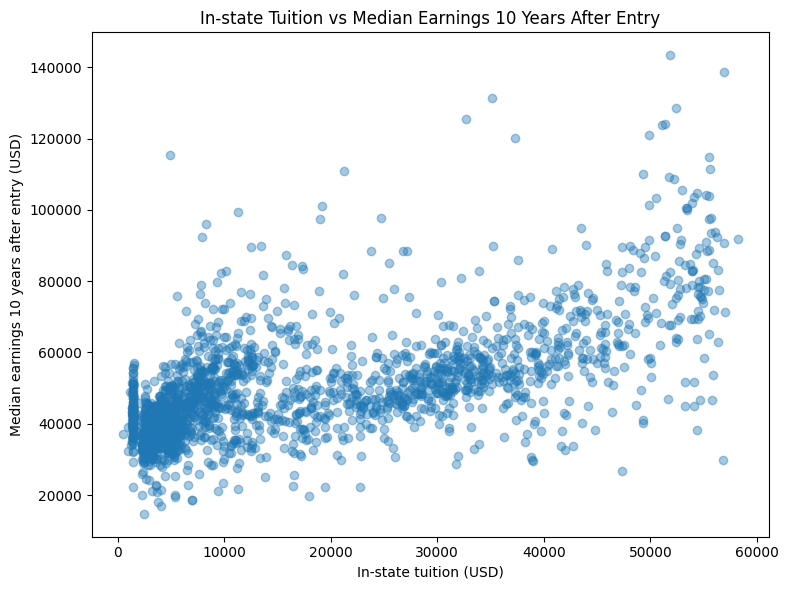

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    clean["in_state_tuition"],
    clean["MD_EARN_WNE_P10"],
    alpha=0.4
)

plt.title("In-state Tuition vs Median Earnings 10 Years After Entry")
plt.xlabel("In-state tuition (USD)")
plt.ylabel("Median earnings 10 years after entry (USD)")

plt.tight_layout()
plt.show()

## Conclusion and Reflection

### Takeaways

From the scatter plot, there appears to be a clear positive relationship between in-state tuition and median earnings 10 years after entry. This pattern is reinforced by the calculated correlation coefficient of **0.637**, which indicates a moderate to strong positive association between the two variables. In general, students who attend higher-tuition institutions tend to earn more later in their careers.

However, the wide dispersion of points in the plot also shows that tuition is far from a perfect predictor of post-graduation income. There are many schools with relatively low tuition whose graduates earn incomes comparable to those from more expensive institutions, as well as some high-tuition schools that do not correspond to particularly high earnings. This suggests that other important factors — such as institutional quality, student selectivity, field of study, geographic location, and individual student characteristics — likely play a significant role in shaping economic outcomes.

Overall, this analysis shows that while higher tuition is associated with higher earnings on average, the relationship is not deterministic. Paying more for college does not guarantee higher income, and lower-cost institutions can still provide strong economic returns for their students.

### Personal reflection

This project helped me better understand the complexity behind commonly held assumptions about higher education and economic mobility. Working with two datasets from different sources required careful cleaning, alignment, and validation. It also highlighted the importance of not over-interpreting correlations and being mindful of hidden variables and structural factors that cannot be fully captured in this type of analysis. This experience strengthened my confidence in using data to critically examine social and economic questions.
